<a href="https://colab.research.google.com/github/rikanga/Easy-Numpy/blob/main/ReduceDimensionUsingFeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality Reducction Using Feature Extraction**


## 9.1 Reducing Features Using Principal Components

**Probelm**

Étant donné un ensemble de fonctionnalités, vous souhaitez réduire le nombre de fonctionnalités tout en conservant le
variance dans les données.

**Solution**
 Nous allons utiliser **Principal Component Analysis** du module **sklearn.decomposition**

In [1]:
# Load libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [2]:
# Load other libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
# Load data
digits = datasets.load_digits()

In [4]:
# Standardize the data
features = StandardScaler().fit_transform(digits.data)

In [6]:
# Create a PCA will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

In [7]:
# Conduct PCA
features_pca = pca.fit_transform(features)

In [8]:
# Show results
print("Original number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_pca.shape))

Original number of features: (1797, 64)
Reduced number of features: (1797, 54)


In [15]:
PCA(n_components=2).fit_transform(features).shape

(1797, 2)

L'analyse en composantes principales (ACP) est une réduction de dimensionnalité linéaire populaire
technique. L'ACP projette des observations sur les composants principaux (espérons-le moins nombreux) de la matrice de caractéristiques qui conservent le plus de variance. PCA est un
technique, ce qui signifie qu'il n'utilise pas les informations du vecteur cible et
à la place, ne considère que la matrice de fonctionnalités.

* **whiten=True**: Transform les données pour avoir une moyenne de 0 et une variance de 1 qsur chaque caractéristique

## 9.2 Reducing Features When Data Is Linearly Inseparable

**Problem**

You suspect you have linearly inseparable data and want to reduce the dimensions.

**Solution**

Use an extension of principal component analysis that uses kernels to allow for nonlinear dimensionality reduction:

In [17]:
# Load libraries
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

In [18]:
# Create linearly inseparable features
features, _ = make_circles(n_samples=1000, random_state=0, noise=0.1, factor=0.1)

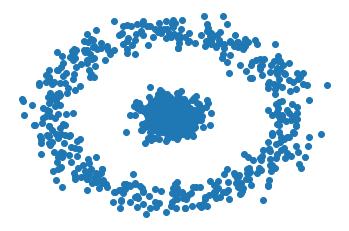

In [23]:
plt.scatter(features[:, 0], features[:, 1]); plt.axis('off'); plt.show()

In [19]:
# Apply PCA with radius basic function (RBF) kernel
kpca = KernelPCA(n_components=1, kernel='rbf', gamma=15)

In [20]:
# Transform features
features_kpca = kpca.fit_transform(features)

In [21]:
# Show output
print("Originl number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_kpca.shape))

Originl number of features: (1000, 2)
Reduced number of features: (1000, 1)


## 9.3 Reducing Features by Maximizing Class Separability(Réduction de caractéristiques en maximisant la séparabilité des classes)

**Problem**

You want to reduce the features to be used by a classifier.

**Solution**

**NB: Cette techniques est utilisée pour faire la réduction des dimensions dans pour de cas de classification**

Try linear discriminant analysis (LDA) to project the features onto component axes
that maximize the separation of classes:

In [24]:
# Load library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
# Load data
iris = datasets.load_iris()

features = iris.data
target = iris.target

In [27]:
# Create a lda
lda = LinearDiscriminantAnalysis(n_components=1)

In [29]:
# Transform data with lda
features_lda = lda.fit_transform(features, target)

In [30]:
# Print the number of features
print("Original number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_lda.shape))
print("Target shape: {}".format(target.shape))

Original number of features: (150, 4)
Reduced number of features: (150, 1)
Target shape: (150,)


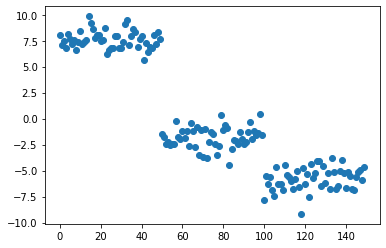

In [38]:
plt.plot(features_lda, 'o')

## 9.4 Reducing Features Using Matrix Factorization

**Problem**

You have a feature matrix of nonnegative values and want to reduce the dimensionality.

**Solution**

Use non-negative matrix factorization (NMF) to reduce the dimensionality of the feature matrix:

In [39]:
# Load library
from sklearn.decomposition import NMF

In [40]:
# Load datasets
digits = datasets.load_digits()

# Load features matrix
features = digits.data

In [41]:
# Create, fit and apply NMF
nmf = NMF(n_components=10, random_state=1)

# Fit and transform feature feature
features_nmf = nmf.fit_transform(features)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [42]:
print("Original number of features: {}".format(features.shape))
print("Reduced number of features: {}".format(features_nmf.shape))

Original number of features: (1797, 64)
Reduced number of features: (1797, 10)


## 9.5 Reducing Features on Sparse Data

**Données éparses: Sont des données dont la grande majorité sont à zéro**

In [ ]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.